<a href="https://colab.research.google.com/github/smu-linear-algebra2/hs/blob/main/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%992_7%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 파일 경로
file_path = '/content/drive/My Drive/data/Iris.csv'

# 파일 불러오기
data = pd.read_csv(file_path)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf

# 입력과 출력 분리
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species']

# 원-핫 인코딩
y = pd.get_dummies(y)

# 데이터를 텐서로 변환
X_train_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

# 모델 생성
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
# optimizer adam == learning rate = 0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 1.2221 - accuracy: 0.5200
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0870 - accuracy: 0.5200
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0003 - accuracy: 0.3933
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9327 - accuracy: 0.3733
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.3667
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.5667
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7878 - accuracy: 0.8000
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.8000
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.7800
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7933
Epoch 11/

In [7]:
X.shape

(150, 5)

In [15]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
y.shape

(150, 3)

In [20]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [21]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

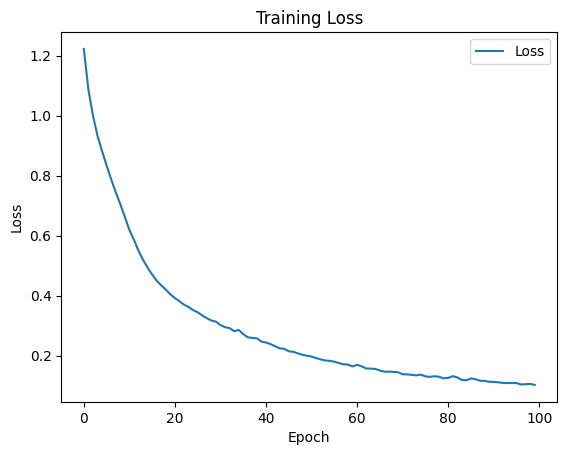

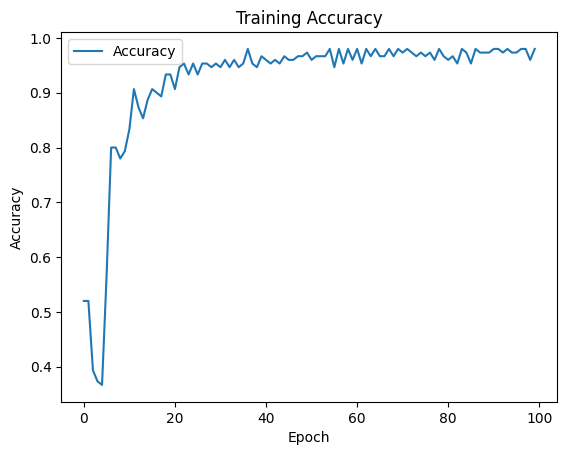

In [27]:
# 손실 그래프 생성
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 생성
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()